# Manipulating Time Series Data in Python

> Updating ...

> You'll learn the basics of manipulating time series data. Time series data are data that are indexed by a sequence of dates or times. 

- toc: true
- branch: master
- badges: true
- comments: true
- author: Datacamp
- categories: [Pandas, Data Visualization, EDA, Time Series, Stock price, scikit-learn, Correlation,  Value-weighte, Index]
- image: images/manipulatingtimeseries.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

> You'll learn how to use methods built into Pandas to work with this index. You'll also learn how resample time series to change the frequency. This course will also show you how to calculate rolling and cumulative values for times series. Finally, you'll use all your new skills to build a value-weighted stock index from actual stock data.

PREREQUISITES: Data Manipulation with pandas

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

import matplotlib as mpl 
mpl.rcParams['figure.dpi'] = 125

pd.set_option('display.expand_frame_repr', False)

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Working with Time Series in Pandas

> This chapter lays the foundations to leverage the powerful time series functionality made available by how Pandas represents dates, in particular by the DateTimeIndex. You will learn how to create and manipulate date information and time series, and how to do calculations with time-aware DataFrames to shift your data in time or create period-specific returns.

### How to use dates & times with pandas

> **Your first time series**

You have learned in the video how to create a sequence of dates using ```pd.date_range()```. You have also seen that each date in the resulting pd.DatetimeIndex is a pd.Timestamp with various attributes that you can access to obtain information about the date.

Now, you'll create a week of data, iterate over the result, and obtain the dayofweek and ```day_name()``` for each date.


Instructions:<br>
- Use ```pd.date_range``` to create seven dates starting from ```'2017-1-1'``` at (default) daily frequency. Use the arguments start and periods. Assign the result to seven_days.

- Iterate over each date in seven_days and in each iteration, print the .dayofweek and .day_name() attributes.


In [2]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())


6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday



### Indexing & resampling time series

> **Create a time series of air quality data**

You have seen in the video how to deal with dates that are not in the correct format, but instead are provided as string types, represented as dtype object in pandas.

We have prepared a data set with air quality data (ozone, pm25, and carbon monoxide for NYC, 2000-2017) for you to practice the use of pd.to_datetime().

Instructions:

- We have already imported pandas as pd and matplotlib.pyplot as plt for you, and loaded the air quality DataFrame into the variable data.
- Inspect data using .info().
- Use pd.to_datetime to convert the column 'date' to dtype datetime64.
- Set the 'date' column as index.
- Validate the changes by inspecting data using .info() again.
- Plot data using subplots=True.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB


None

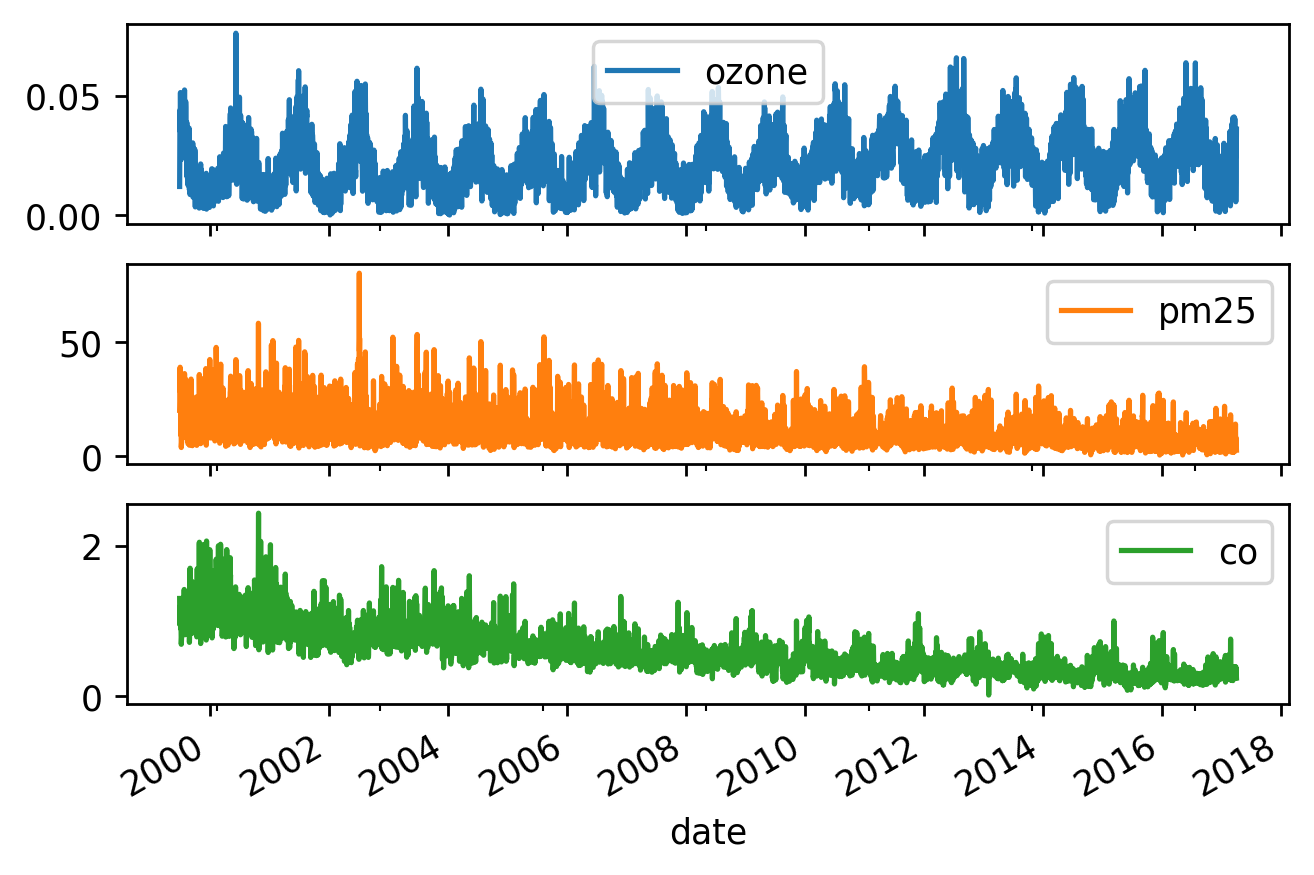

In [8]:
data = pd.read_csv('./datasets/nyc.csv')

# Inspect data
display(data.info())

# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)

# Set date column as index
data.set_index("date",inplace = True)

# Inspect data 
display(data.info())

# Plot data
data.plot(subplots = True)
# plt.tight_layout()
plt.show()


> **Compare annual stock price trends**

You have seen how to select sub-periods from a time series. You'll use this to compare the performance for three years of Yahoo stock prices.

Instructions:
- We have already imported pandas as pd and matplotlib.pyplot as plt and we have already loaded the 'yahoo.csv' file in a variable yahoo with DateTimeIndex and a single column price.
- Create an empty pd.DataFrame() called prices.
- Iterate over a list containing the three years, 2013, 2014, and 2015, as string, and in each loop:
    - Use the iteration variable to select the data for this year and the column price.
    - Use .reset_index() with drop=True to remove the DatetimeIndex.
    - Rename the column price column to the appropriate year.
    - Use pd.concat() to combine the yearly data with the data in prices along axis=1.
- Plot prices.


In [9]:
yahoo = pd.read_csv("./datasets/yahoo.csv")

# Convert the date column to datetime64
yahoo['date']= pd.to_datetime(yahoo['date'])
# Set date column as index
yahoo.set_index('date',inplace = True)

display(yahoo.head())

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


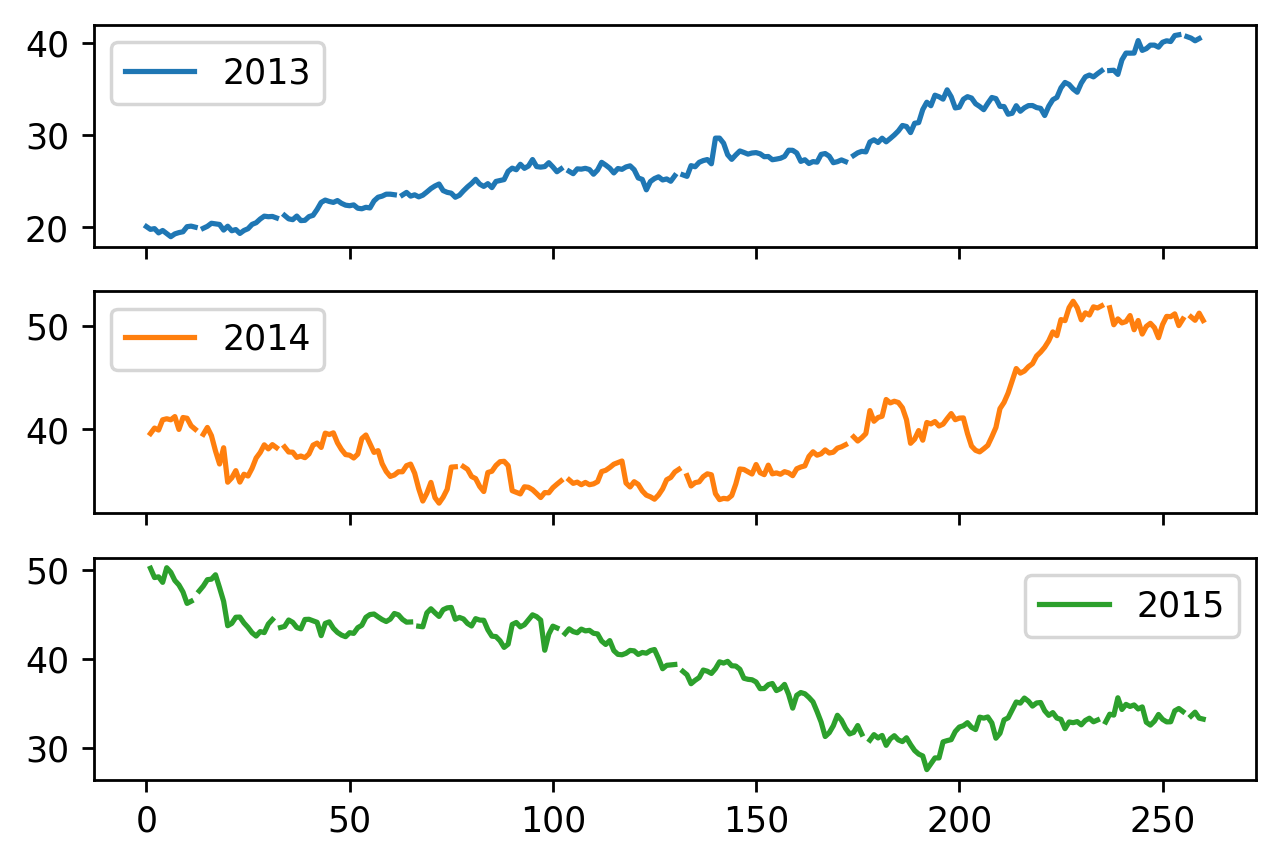

In [10]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in [ '2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot(subplots = True)
plt.show()

 The plot you just created shows Yahoo's stock price in three different years.


> **Set and change time series frequency**


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


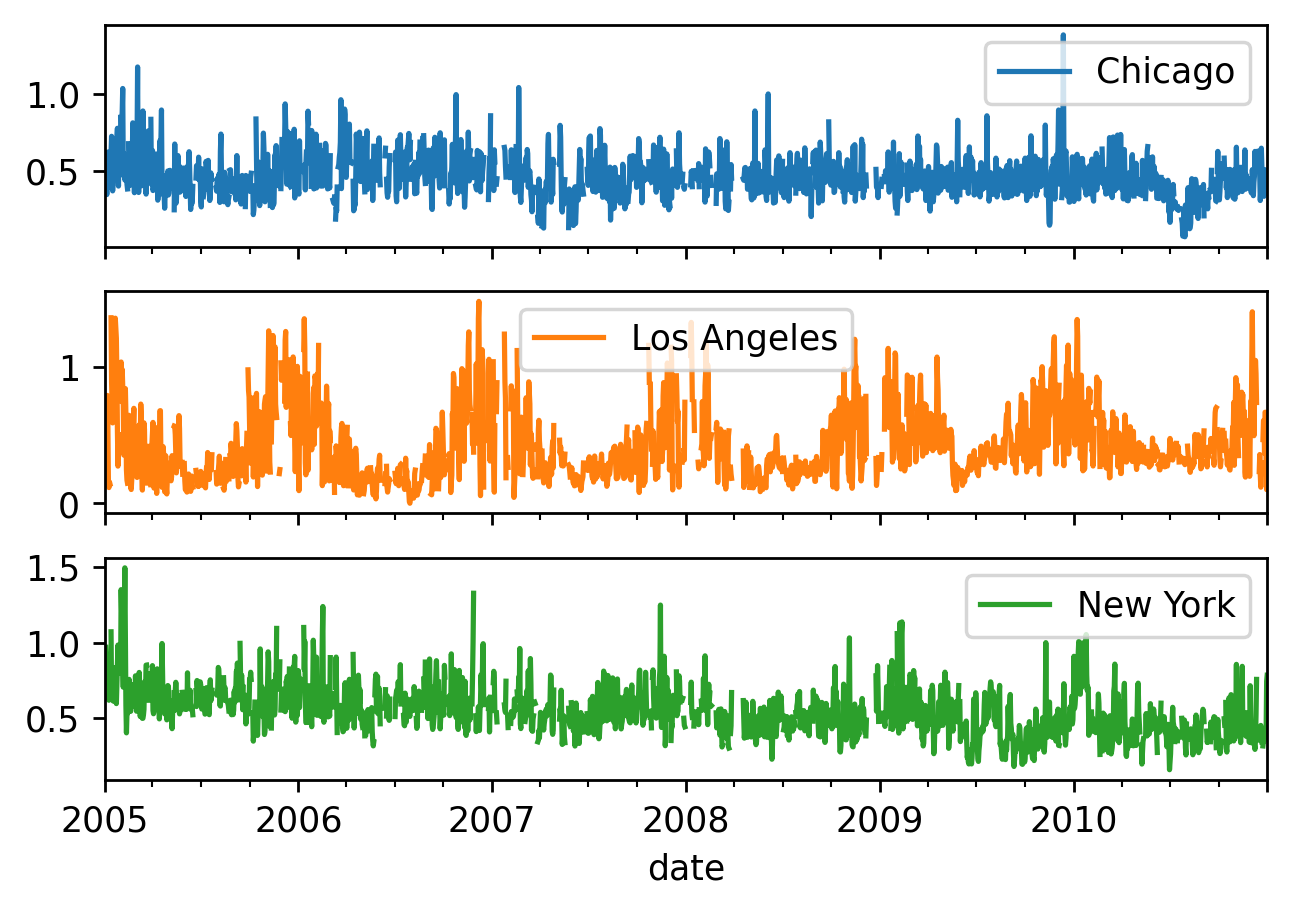

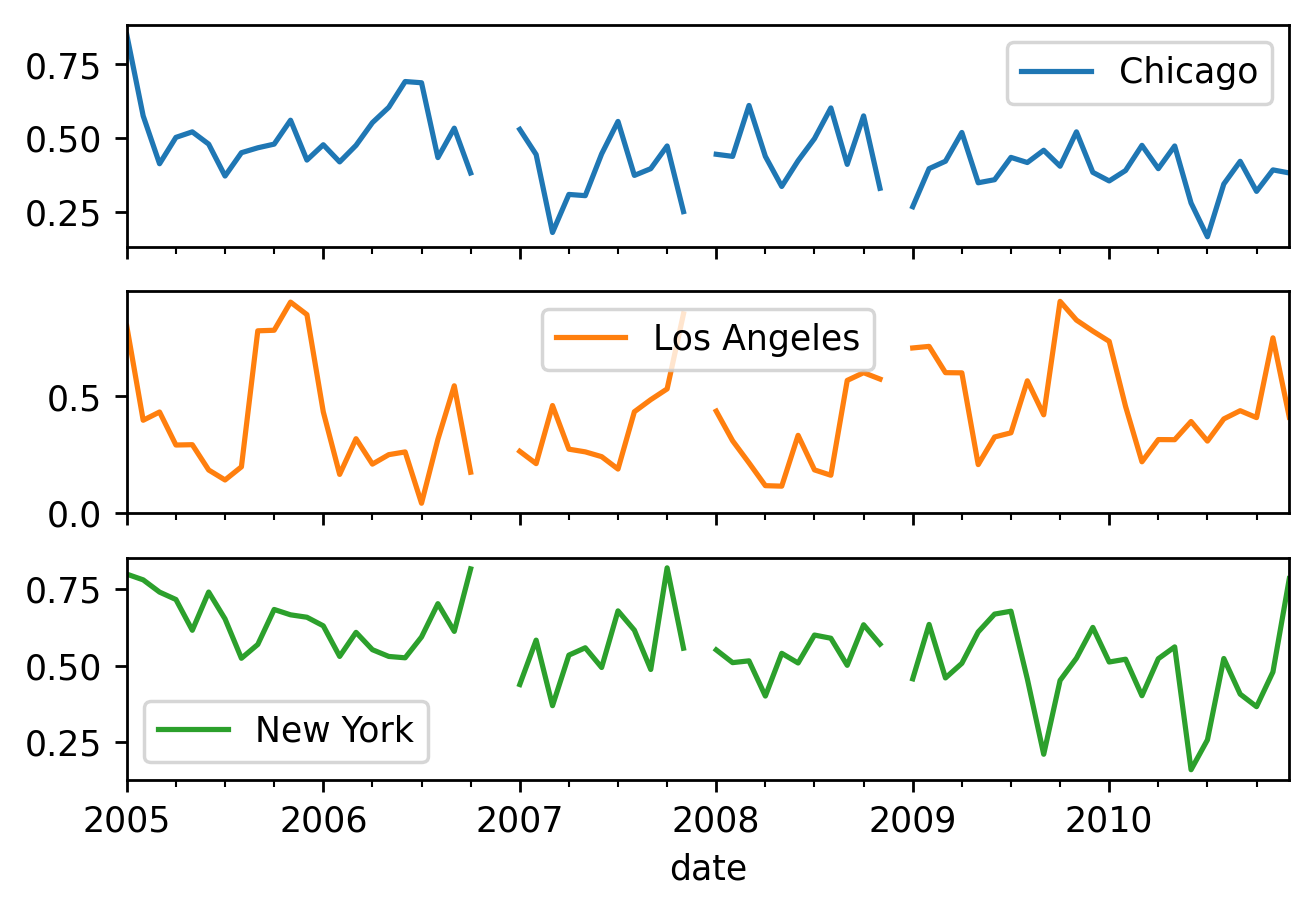

In [15]:
co = pd.read_csv('./datasets/co_cities.csv', parse_dates=['date'], index_col='date')
# Inspect data
print(co.info())
co.head()

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
plt.show()


# # Set frequency to monthly
co = co.asfreq('M')
# Plot the data
co.plot(subplots=True)
plt.show()




### Lags, changes, and returns for stock price series

> **Shifting stock prices across time**


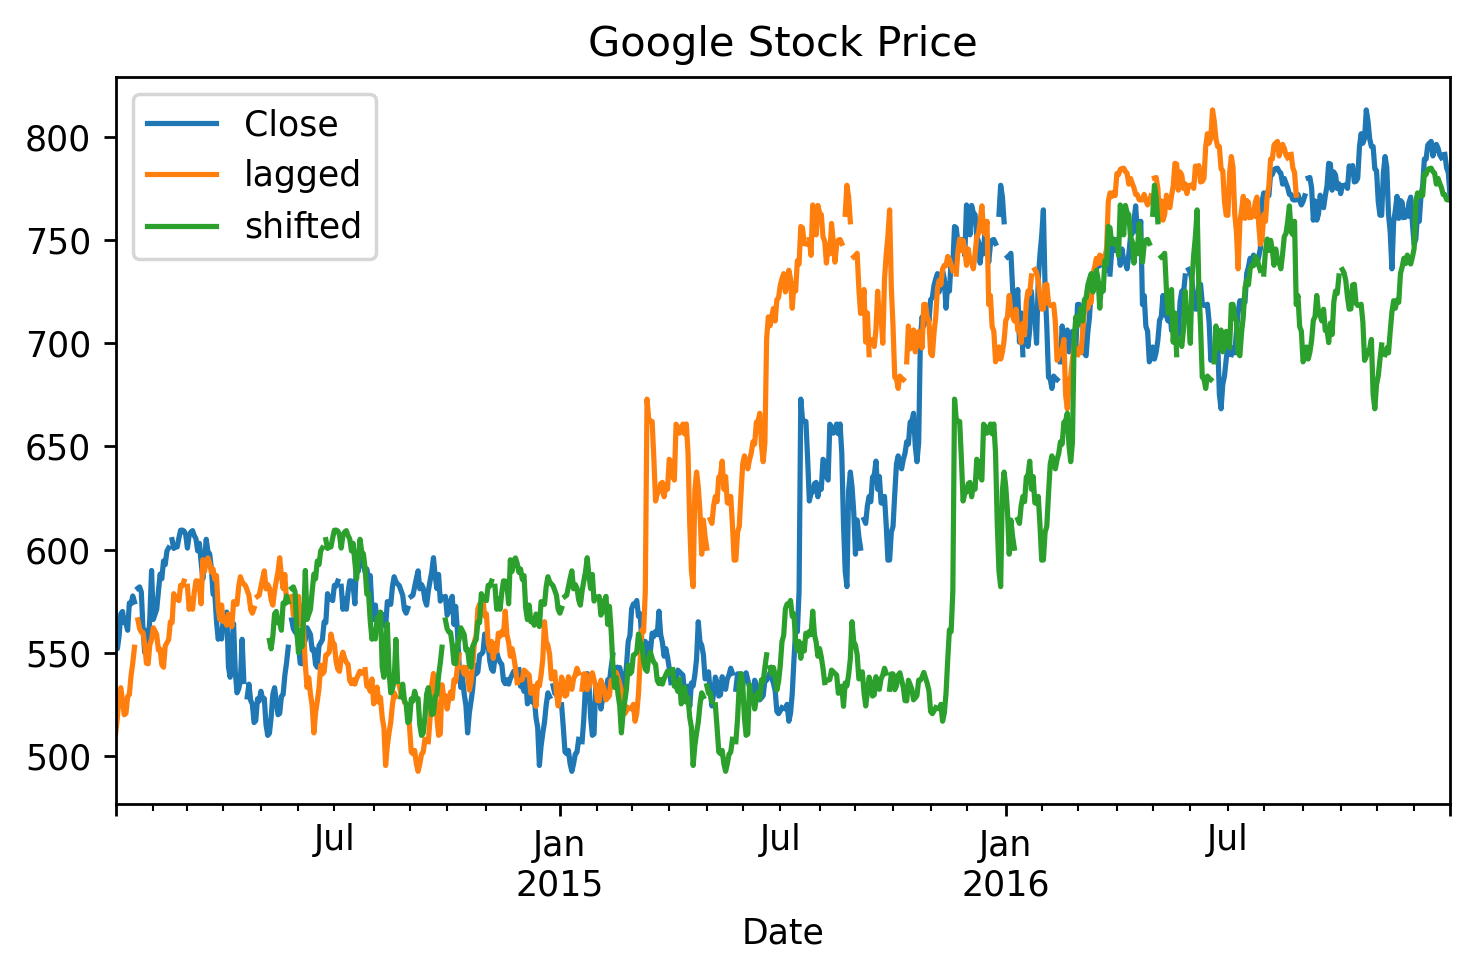

In [11]:
# Import data here
google = pd.read_csv('./datasets/google.csv', parse_dates=['Date'], index_col='Date')
# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(-90)
google['shifted'] = google.Close.shift(90)

# Plot the google price series

google.plot(title='Google Stock Price')
plt.tight_layout()
plt.show()

> **Calculating stock price changes**


> **Plotting multi-period returns**


## Basic Time Series Metrics & Resampling

> This chapter dives deeper into the essential time series functionality made available through the pandas DataTimeIndex. It introduces resampling and how to compare different time series by normalizing their start points.

### Compare time series growth rates

> **Compare the performance of several asset classes**



> **Comparing stock prices with a benchmark**


> **Plot performance difference vs benchmark index**



### Changing the time series frequency: resampling
> **Convert monthly to weekly data**


> **Create weekly from monthly unemployment data**



### Upsampling & interpolation with .resample()

> **Use interpolation to create weekly employment data**


> **Interpolate debt/GDP and compare to unemployment**



### Downsampling & aggregation

> **Compare weekly, monthly and annual ozone trends for NYC & LA**


> **Compare monthly average stock prices for Facebook and Google**


> **Compare quarterly GDP growth rate and stock returns**


> **Visualize monthly mean, median and standard deviation of S&P500 returns**


## Window Functions: Rolling & Expanding Metrics

> This chapter will show you how to use window function to calculate time series metrics for both rolling and expanding windows.

### Rolling window functions with pandas
- Rolling average air quality since 2010 for new york city
- Rolling 360-day median & std. deviation for nyc ozone data since 2000
- Rolling quantiles for daily air quality in nyc

### Expanding window functions with pandas
- Cumulative sum vs .diff()
- Cumulative return on $1,000 invested in google vs apple I
- Cumulative return on $1,000 invested in google vs apple II

### Case study: S&P500 price simulation
- Random walk I
- Random walk II
- Random walk III

### Relationships between time series: correlation
- Annual return correlations among several stocks





## Putting it all together: Building a value-weighted index

> This chapter combines the previous concepts by teaching you how to create a value-weighted index. This index uses market-cap data contained in the stock exchange listings to calculate weights and 2016 stock price information. Index performance is then compared against benchmarks to evaluate the performance of the index you created.

### Select index components & import data
- Explore and clean company listing information
- Select and inspect index components
- Import index component price information

### Build a market-cap weighted index
- Calculate number of shares outstanding
- Create time series of market value
- Calculate & plot the composite index

### Evaluate index performance
- Calculate the contribution of each stock to the index
- Compare index performance against benchmark I
- Compare index performance against benchmark II

### Index correlation & exporting to Excel
- Visualize your index constituent correlations
- Save your analysis to multiple excel worksheets
- Congratulations!

